In [35]:
import pandas as pd
import numpy as np
import statistics
import sklearn
import warnings
#import missingno as msno
#warnings.filterwarnings('ignore')

In [36]:
from datetime import datetime, timedelta
from math import sqrt

In [37]:
#from sklearn.model_selection  import train_test_split
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [38]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, classification_report

In [39]:
#matplotlib inline
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as scs
import scipy.stats as stats


In [40]:
#pip install seaborn --upgrade

In [41]:
import statsmodels.api as sm
from datetime import date, datetime, time

In [42]:
#Input and Read Data
#Input
df_bankdata=pd.read_csv('bank-full.csv',delimiter=';')

In [43]:
df_bankdata.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [44]:
df_bankdata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [45]:
df_bankdata.isnull().sum().sort_values(ascending=False )

y            0
loan         0
job          0
marital      0
education    0
default      0
balance      0
housing      0
contact      0
poutcome     0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
age          0
dtype: int64

In [46]:
data_dup =df_bankdata[df_bankdata.duplicated(keep="last")]
data_dup

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [47]:
df_bankdata.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


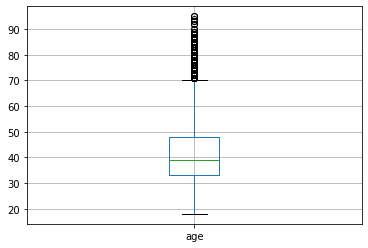

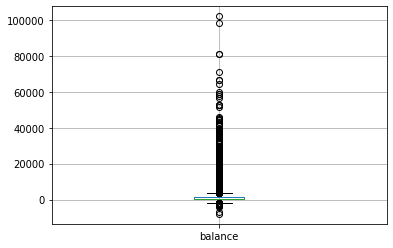

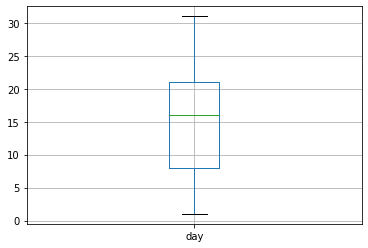

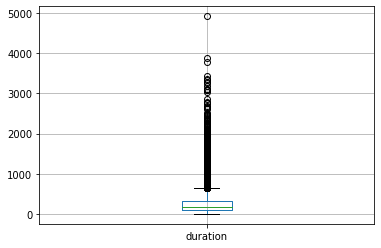

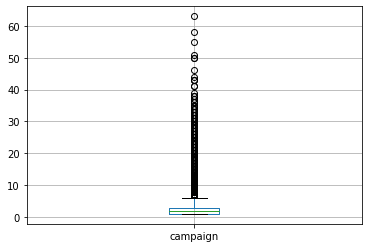

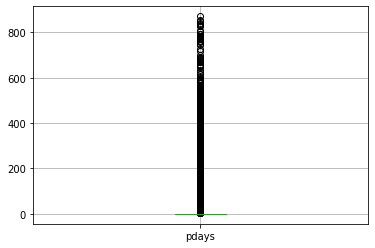

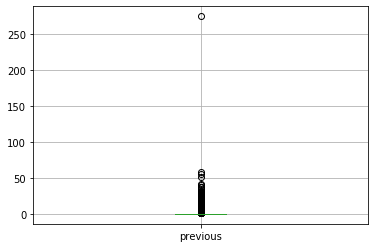

In [48]:
Numerical_column = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays','previous']
for i in (Numerical_column):
    df_bankdata.boxplot(column=[i])
    plt.show()

In [49]:
#Check to see if there are any null values 
df_bankdata.isnull().sum().sort_values(ascending=False)

y            0
loan         0
job          0
marital      0
education    0
default      0
balance      0
housing      0
contact      0
poutcome     0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
age          0
dtype: int64

In [50]:
df_bankdata.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


age


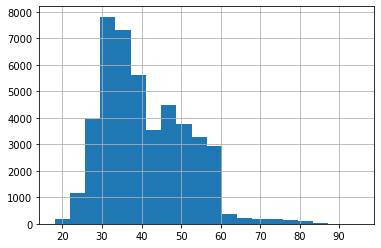

balance


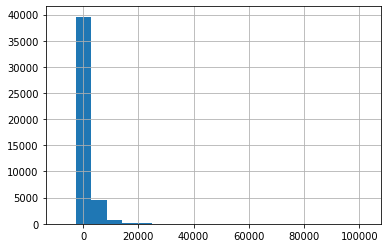

day


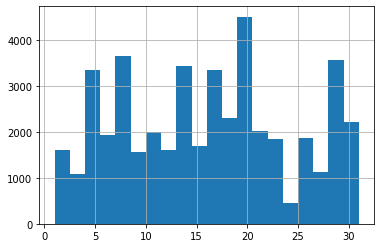

duration


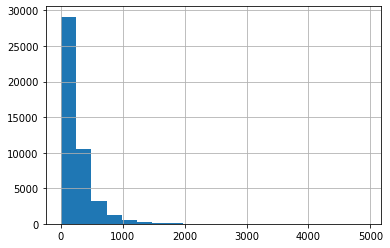

campaign


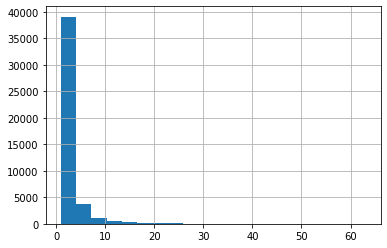

pdays


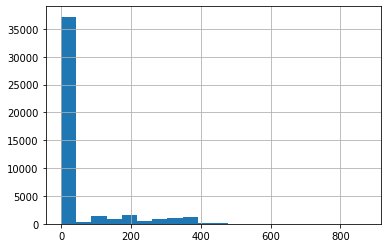

previous


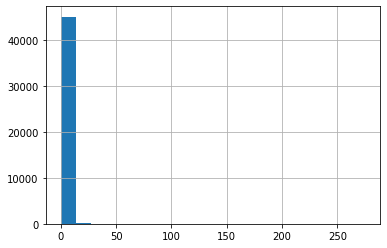

In [51]:
for num in (Numerical_column):
    print(num)
    hist = df_bankdata[num].hist(bins=20)
    plt.show()

In [52]:
df_bankdata

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [53]:
for num in (Numerical_column):
    print(num + ' median', df_bankdata[num].quantile(0.50)) 
    print(num + ' outlier', df_bankdata[num].quantile(0.95)) 
    df_bankdata[num] = np.where(df_bankdata[num] >= df_bankdata[num].quantile(0.95), df_bankdata[num].quantile(0.50) , df_bankdata[num])
    df_bankdata.describe()

age median 39.0
age outlier 59.0
balance median 448.0
balance outlier 5768.0
day median 16.0
day outlier 29.0
duration median 180.0
duration outlier 751.0
campaign median 2.0
campaign outlier 8.0
pdays median -1.0
pdays outlier 317.0
previous median 0.0
previous outlier 3.0


In [54]:
df_bankdata.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,39.514167,835.274336,14.606401,212.857889,2.202429,21.571564,0.154476
std,8.811742,1188.795967,7.130690,153.400688,1.412550,63.733388,0.473055
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,46.000000,1125.500000,20.000000,280.000000,3.000000,-1.000000,0.000000
max,58.000000,5766.000000,28.000000,750.000000,7.000000,316.000000,2.000000


In [55]:
for num in (Numerical_column):
    #print("Log"+num)
    df_bankdata["Log"+num] = df_bankdata[num].map(lambda i: np.log(i) if i > 0 else 0) 
    print(num, df_bankdata[num].skew())
    print("Log"+num, df_bankdata["Log"+num].skew())

age 0.32218529659773626
Logage -0.10255844307349565
balance 1.823543994377086
Logbalance -0.9877824236498287
day 0.0023710776721122067
Logday -1.214030394196237
duration 1.2547885638149134
Logduration -0.90843017861458
campaign 1.4371994813929192
Logcampaign 0.4340545133997517
pdays 2.8648302400853383
Logpdays 2.2416675354295603
previous 3.0851540207342536
Logprevious 4.303231052527699


In [56]:
df_bankdata.describe()

,age,balance,day,duration,campaign,pdays,previous,Logage,Logbalance,Logday,Logduration,Logcampaign,Logpdays,Logprevious
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,39.514167,835.274336,14.606401,212.857889,2.202429,21.571564,0.154476,3.651610,5.151429,2.507670,5.074416,0.615173,0.658469,0.032288
std,8.811742,1188.795967,7.130690,153.400688,1.412550,63.733388,0.473055,0.224992,2.661126,0.670130,0.837254,0.574984,1.706395,0.146076
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,2.890372,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,3.496508,4.276666,2.079442,4.634729,0.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,3.663562,6.104793,2.772589,5.192957,0.693147,0.000000,0.000000
75%,46.000000,1125.500000,20.000000,280.000000,3.000000,-1.000000,0.000000,3.828641,7.025983,2.995732,5.634790,1.098612,0.000000,0.000000
max,58.000000,5766.000000,28.000000,750.000000,7.000000,316.000000,2.000000,4.060443,8.659734,3.332205,6.620073,1.945910,5.755742,0.693147


In [57]:
df_bankdata.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,...,previous,poutcome,y,Logage,Logbalance,Logday,Logduration,Logcampaign,Logpdays,Logprevious
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,...,0.0,unknown,no,4.060443,7.669962,1.609438,5.564520,0.0,0.0,0.0
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,...,0.0,unknown,no,3.784190,3.367296,1.609438,5.017280,0.0,0.0,0.0
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,...,0.0,unknown,no,3.496508,0.693147,1.609438,4.330733,0.0,0.0,0.0
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,...,0.0,unknown,no,3.850148,7.317212,1.609438,4.521789,0.0,0.0,0.0
4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5.0,...,0.0,unknown,no,3.496508,0.000000,1.609438,5.288267,0.0,0.0,0.0


In [58]:
print(df_bankdata["job"].value_counts())
print("*"*30)
print(df_bankdata["marital"].value_counts())
print("*"*30)
print(df_bankdata["education"].value_counts())
print("*"*30)

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
******************************
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
******************************
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
******************************


In [59]:
print(df_bankdata["y"].value_counts())

no     39922
yes     5289
Name: y, dtype: int64


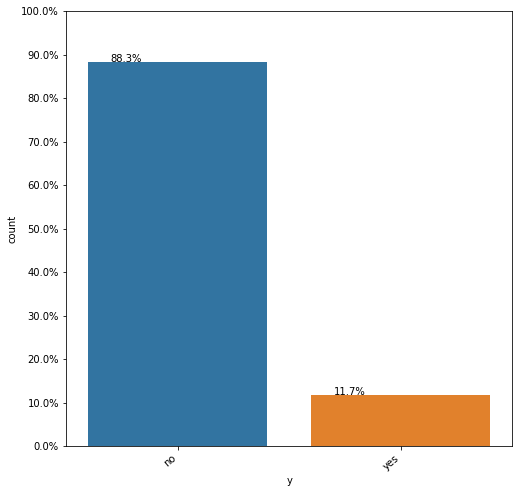

In [60]:
#The above data is imbalanced with the number of nos being over 88 percent more likely than yes.
# We will now continue with the Exploritory Data Analysis.
# To see the distribution of the imbalance we do the following:
plt.figure(figsize=(8,8))
Y = df_bankdata["y"]
total = len(Y)*1.
ax=sns.countplot(x="y", data=df_bankdata)
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#use 10 steps from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))
#adjust the ticklabel to the desired format, without changing the position of the ticks.
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
# ax.legend(labels=["no","yes"])
plt.show()


In [61]:
#Next we will find the distribution for each of the counts that we completed above.
def countplot(label, df_bankdata):
  plt.figure(figsize=(10,8))
  Y = df_bankdata[label]
  total = len(Y)*1.
  ax=sns.countplot(x=label, data=df_bankdata)
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  # ax.legend(labels=["no","yes"])
  plt.title(label +" "+ " count")
  plt.show()

%matplotlib inline

def countplot_withY(label, df_bankdata):
  plt.figure(figsize=(10,8))
  Y = df_bankdata[label]
  total = len(Y)*1.
  ax=sns.countplot(x=label, data=df_bankdata, hue="y")
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  # ax.legend(labels=["no","yes"])
  plt.title(label +""+ " count vs yes/no")
  plt.show()

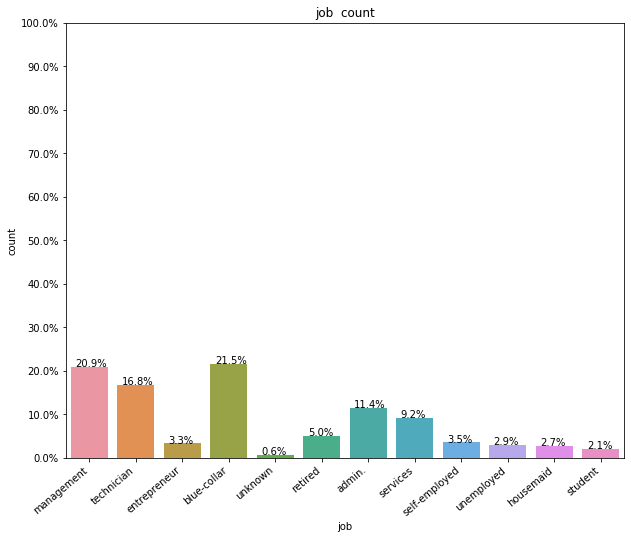

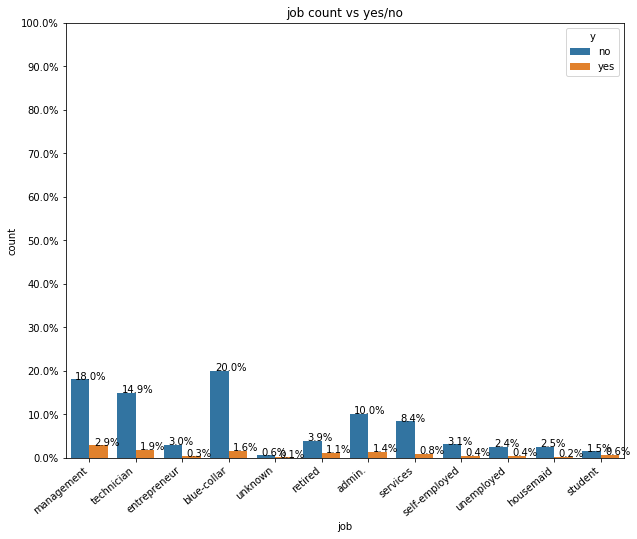

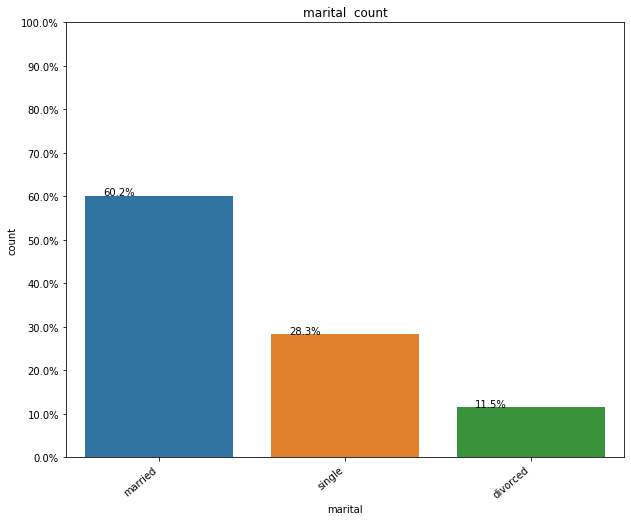

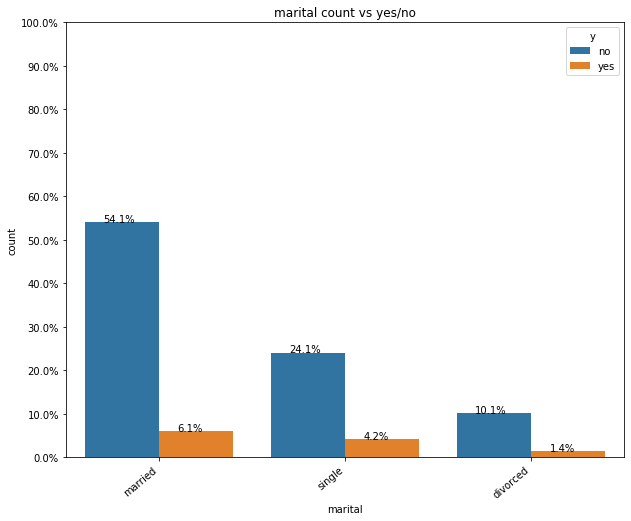

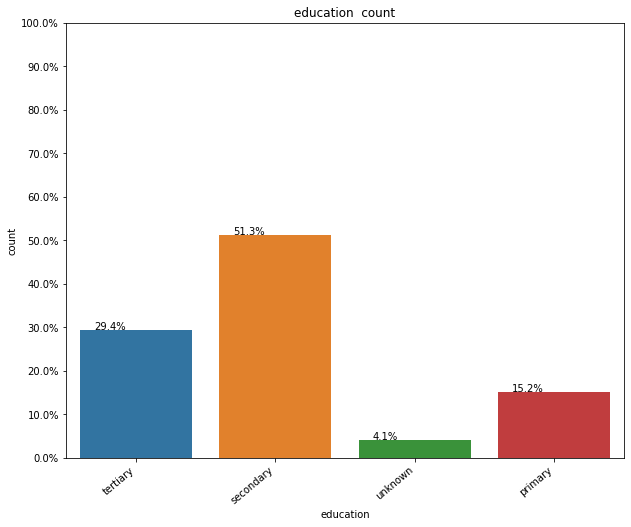

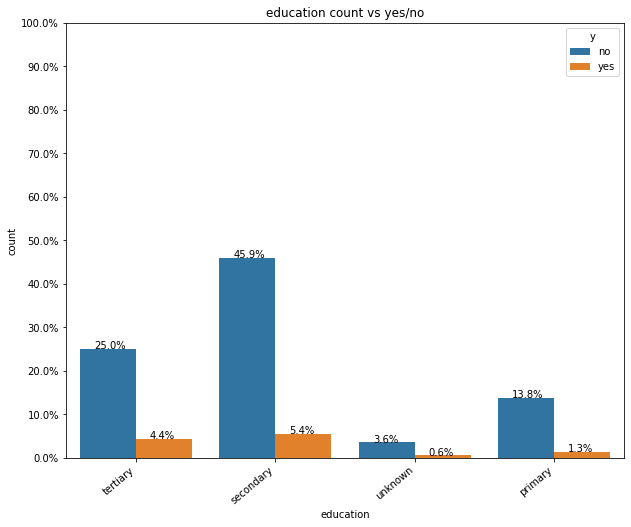

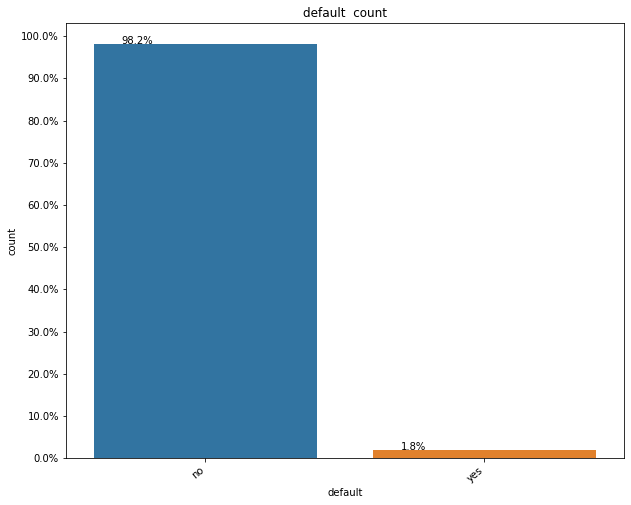

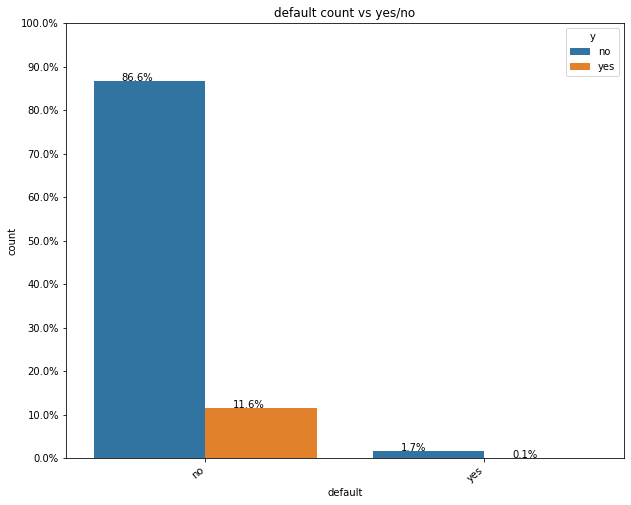

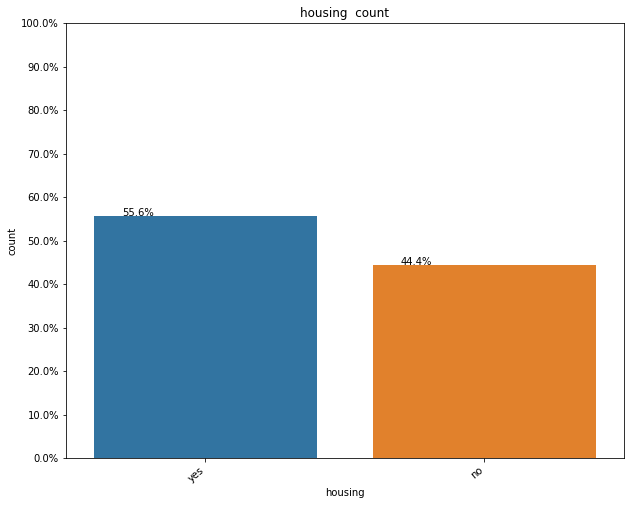

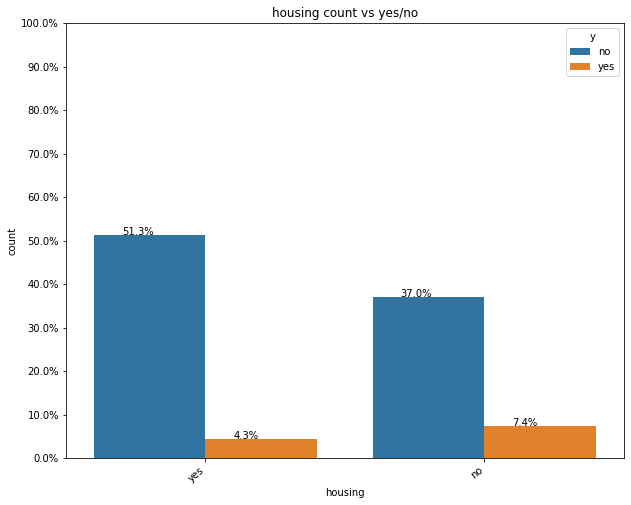

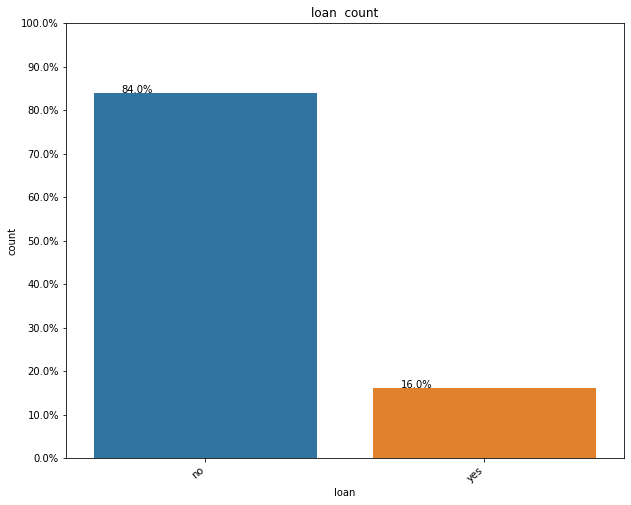

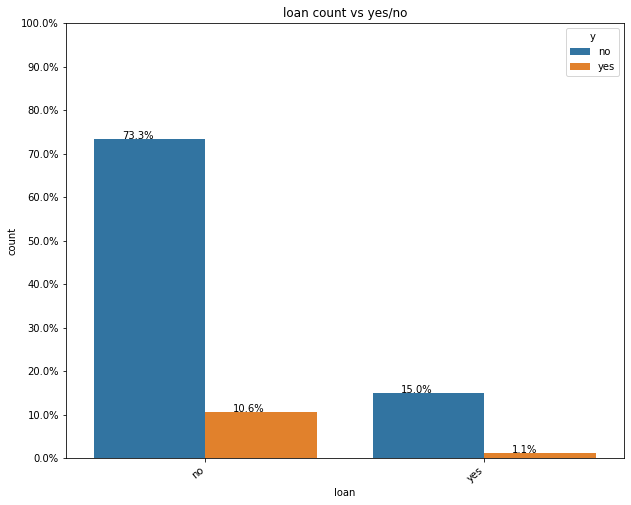

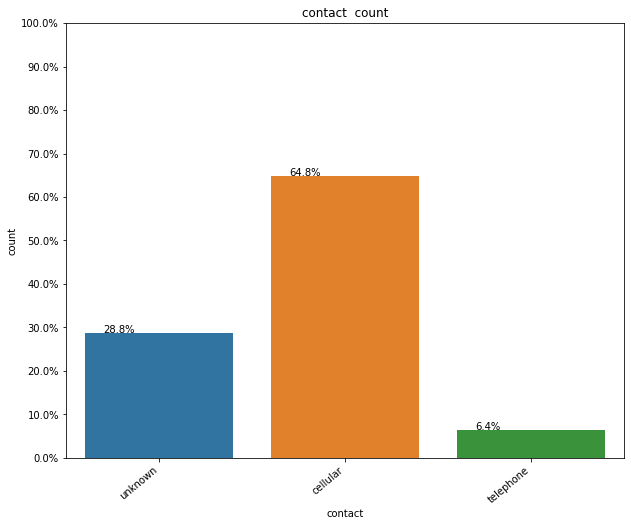

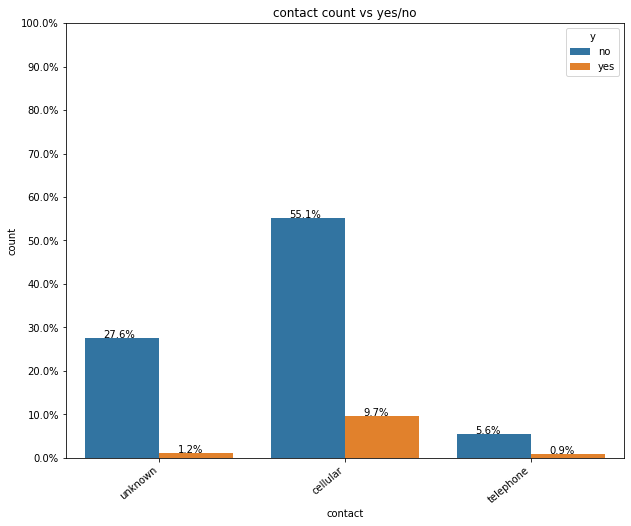

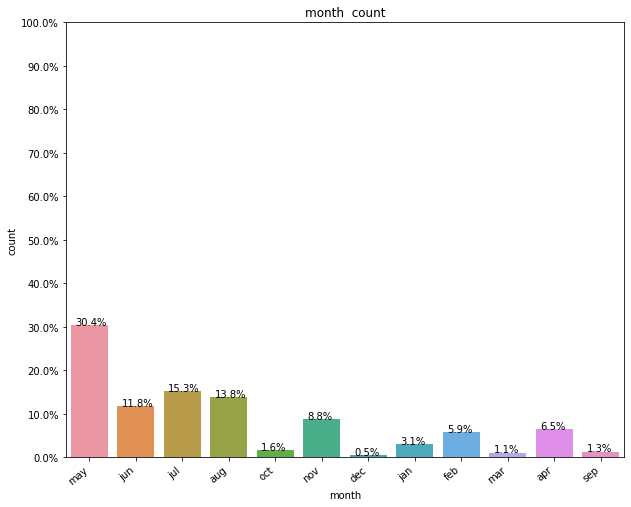

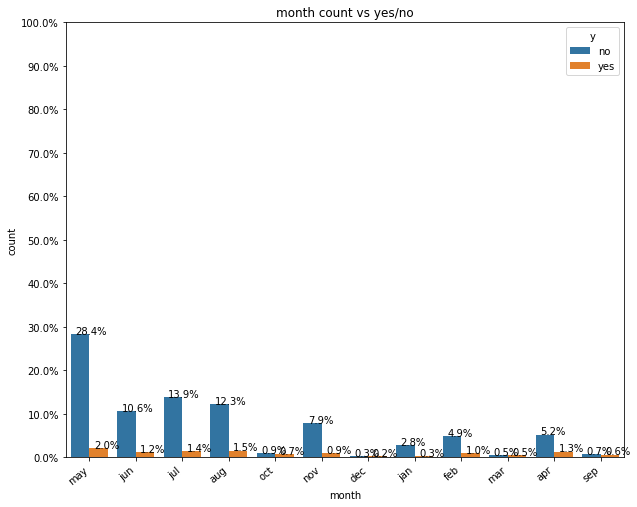

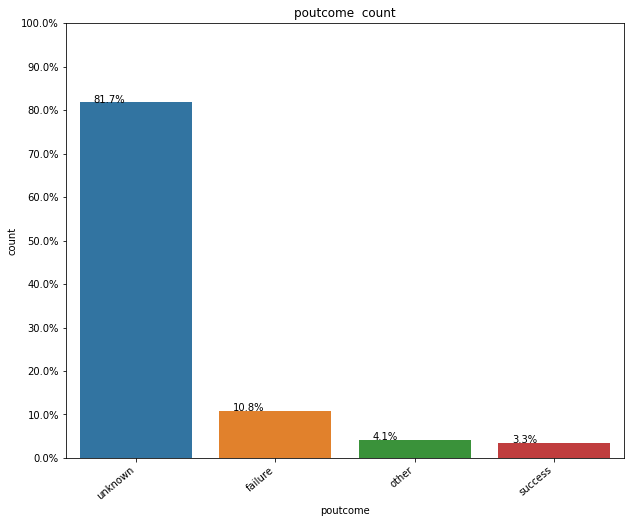

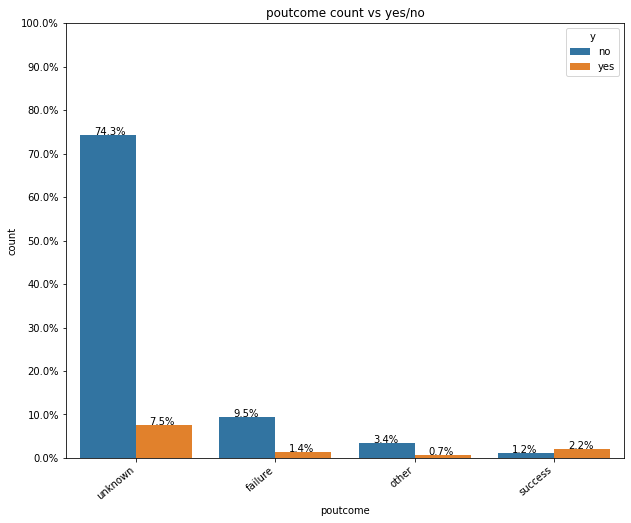

In [62]:
#Customers with a marital status of married have the highest rate of subscriptions and non prescriptions.  
#This is because most customers are married.

Categorical_column = ['job', 'marital', 'education', 'default', 'housing', 'loan','contact', 'month', 'poutcome']
for i in (Categorical_column):
    countplot(i, df_bankdata)
    countplot_withY(i, df_bankdata)


In [63]:
#Customers with the job blue-collar were more likely to subscribe
#Customers with the marital status "married" are more likely to subscribe and not to subscribe.  This is because most customers are married.
#Customers with a secondary education are more likely to suscribe and not subscribe. Most customers have a secondary education.
#Most customers do not have defaulted credit so they are more likely to to subscribe as well as not subscribe.  But most of them subscribe.
#Those with a housing loan are more likely to subscribe.
#Most customers do not have a personal loan so they are more likely to subscribe if they do not have a personal loan.
#Most customers have cell phones.
#Most customers were contacted last in May.
#Most customers have a previous outcome of unknown.

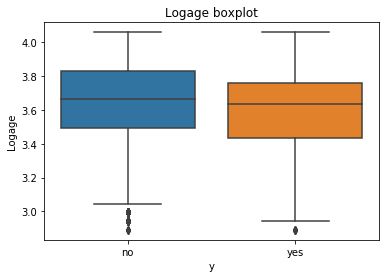

<Figure size 720x576 with 0 Axes>

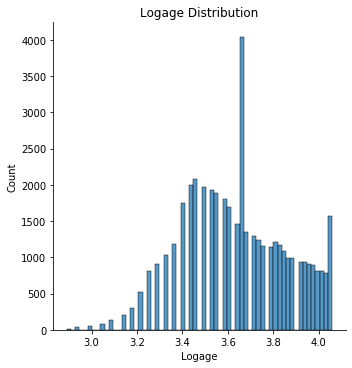

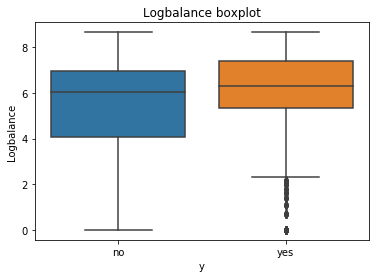

<Figure size 720x576 with 0 Axes>

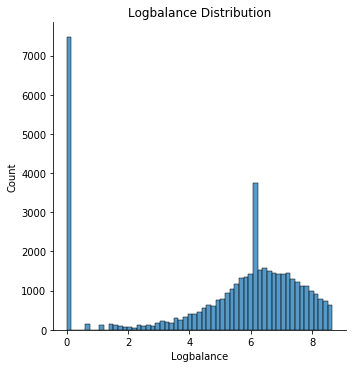

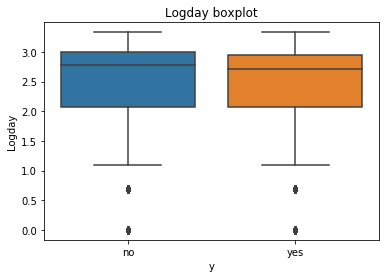

<Figure size 720x576 with 0 Axes>

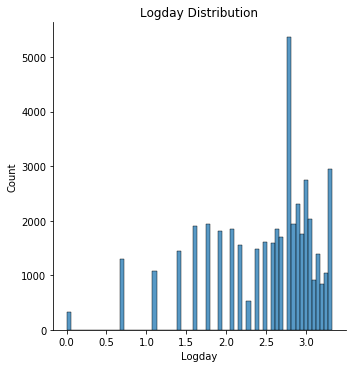

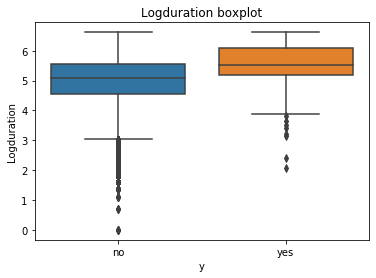

<Figure size 720x576 with 0 Axes>

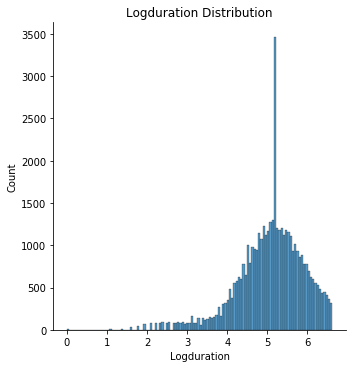

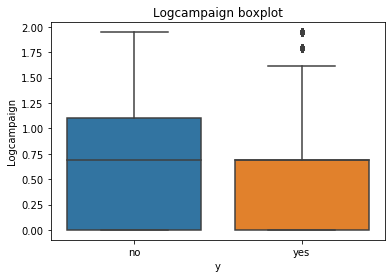

<Figure size 720x576 with 0 Axes>

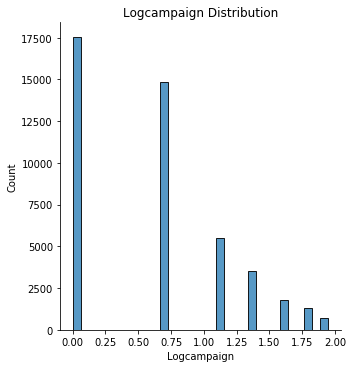

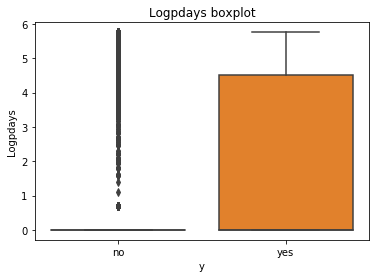

<Figure size 720x576 with 0 Axes>

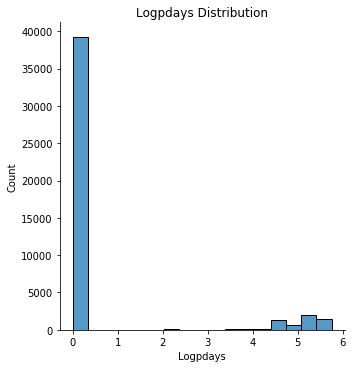

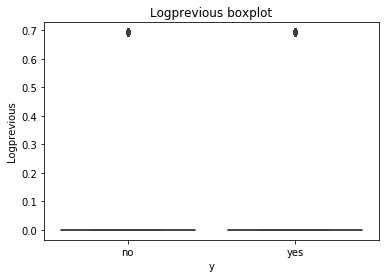

<Figure size 720x576 with 0 Axes>

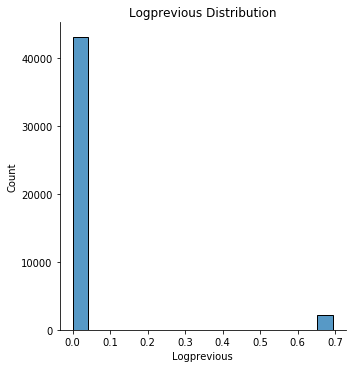

In [64]:
Log_numcol=['Logage', 'Logbalance', 'Logday', 'Logduration', 'Logcampaign', 'Logpdays','Logprevious']
#for num in (Numerical_column):
for num in (Log_numcol):
    hist = df_bankdata[num].hist(bins=30)
    %matplotlib inline
    sns.boxplot(data=df_bankdata, x="y", y=num)
    plt.title(num+" "+ "boxplot")
    plt.figure(figsize=(10,8))
    sns.displot(df_bankdata[num])
    plt.title(num+" "+ "Distribution")
    plt.show()


In [65]:
# For the customers subscribed and non-subscribed the median age is 37 to 39. With so much overlapping age isn't a good indicator for customers and their subscription choices.
# From the distribution most of the customers are 30 to 45
# The median for balance is same for customers who subscribed and who do not subscribe. There is a lot of overlap so it does not seem useful
# The median for day is 15 to 16 for customers who subscibe and not subscribe. 
# The distribution for day is between 5 and 20. With so much overlap day isn't a good indicator
# The duration, campaign and pdays has very little overlap so they will be useful in indicating subscription choices.
# The distribution for previous most customer fall in the range 0 to 0.25.

Text(0.5, 1.05, 'Pearson correlation of Features')

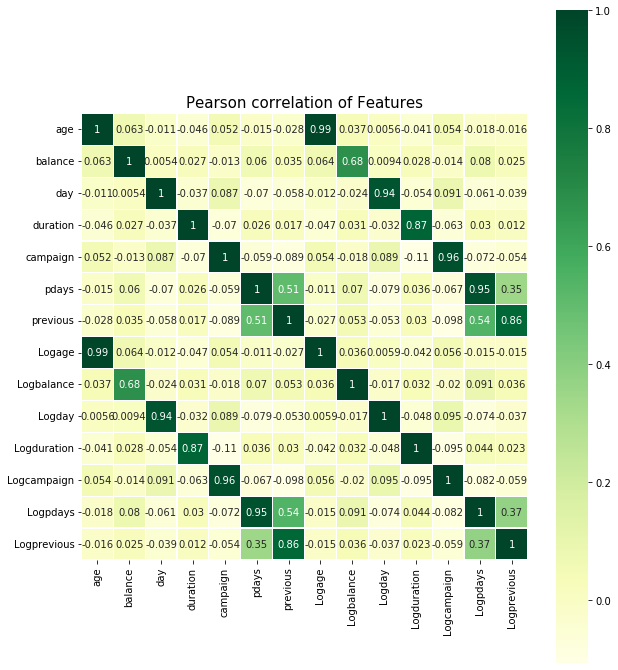

In [66]:
# Idea of correlation matrix
#Now we will explore the correlation matrix to get a better understanding of how all the variables
#are related

corr = df_bankdata.corr()
f, ax = plt.subplots(figsize=(10,12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
_ = sns.heatmap(corr, cmap="YlGn", square=True, ax=ax, annot=True, linewidth=0.1)
plt.title("Pearson correlation of Features", y=1.05, size=15)



In [67]:
#Previous and pdays have the highest correlation. Previous and pdays have the highest correlation .  They have a postive correlation of .69.